# Import Libraries

In [2]:
# Import libraries for numerical computations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

# Import Dataset into Python

In [4]:
health_df = pd.read_csv("Mental Health Dataset.csv")
health_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Exploratory Data Analysis

In [6]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [7]:
health_df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


### Check Missing Variables

In [9]:
print('Percentage of Missing Values')
(health_df.isna().mean() * 100).round(1)

Percentage of Missing Values


Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [10]:
health_df.dropna(inplace = True)

#### Since there is less than 2% missing data, dropping those rows should have minimal impact.

In [12]:
health_df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [13]:
health_df.drop_duplicates(inplace = True)

In [14]:
health_df.drop(columns = "Timestamp", inplace = True)

### Outliers Check

In [16]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   284858 non-null  object
 1   Country                  284858 non-null  object
 2   Occupation               284858 non-null  object
 3   self_employed            284858 non-null  object
 4   family_history           284858 non-null  object
 5   treatment                284858 non-null  object
 6   Days_Indoors             284858 non-null  object
 7   Growing_Stress           284858 non-null  object
 8   Changes_Habits           284858 non-null  object
 9   Mental_Health_History    284858 non-null  object
 10  Mood_Swings              284858 non-null  object
 11  Coping_Struggles         284858 non-null  object
 12  Work_Interest            284858 non-null  object
 13  Social_Weakness          284858 non-null  object
 14  mental_health_interview  

In [17]:
def count_plot(category):  

  # Create count plot with dynamic title
  sns.countplot(data = health_df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = health_df[category].value_counts()
  category_percentages = health_df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_health_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_health_df["Count"] = stats_health_df["Count"].apply("{:,}".format)
  stats_health_df["Proportion"] = stats_health_df["Proportion"].apply("{:.1%}".format)

  return stats_health_df

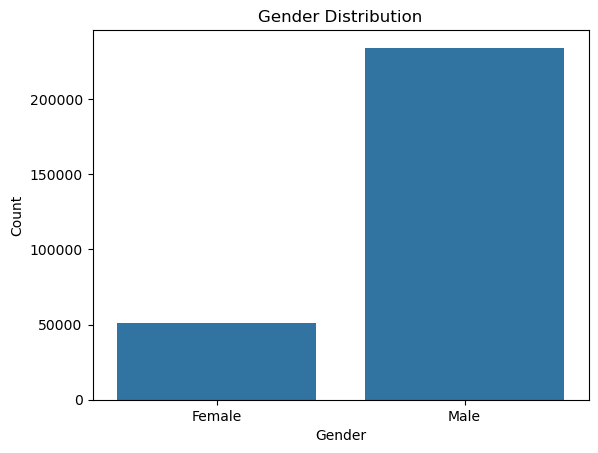

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [18]:
count_plot("Gender")

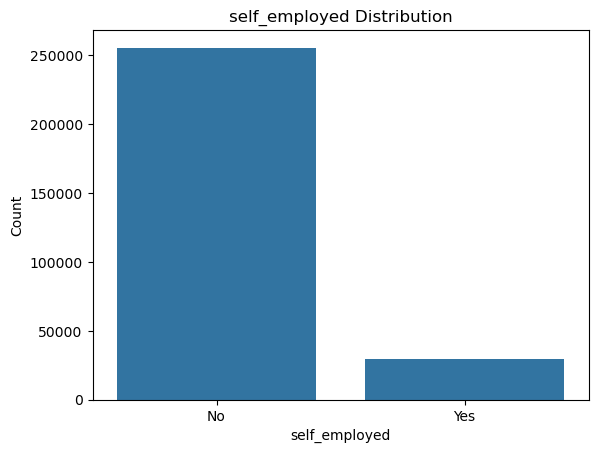

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [19]:
count_plot("self_employed")

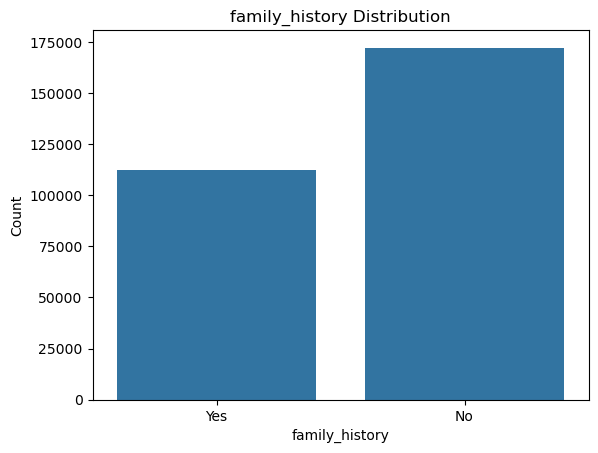

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [20]:
count_plot("family_history")

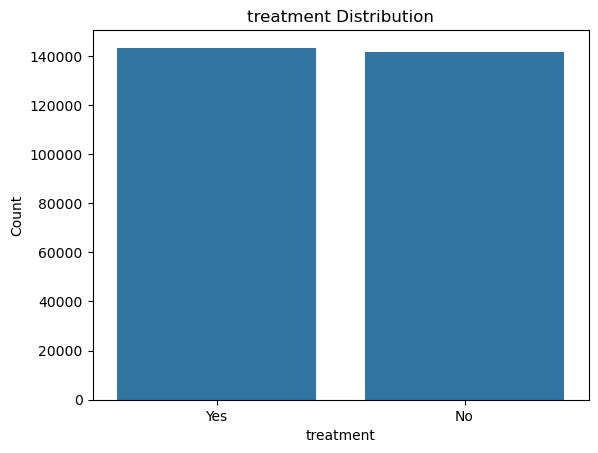

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [21]:
count_plot("treatment")

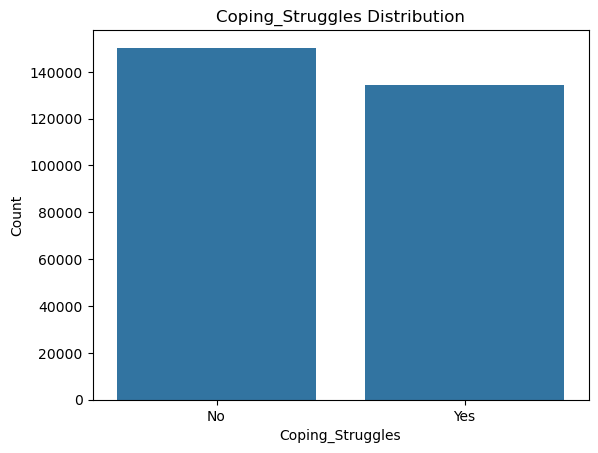

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [22]:
count_plot("Coping_Struggles")

In [23]:
def bar_plot(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_health_df = health_df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_health_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

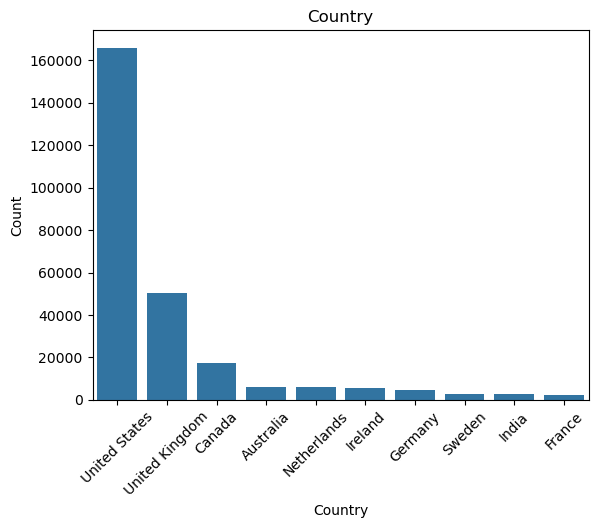

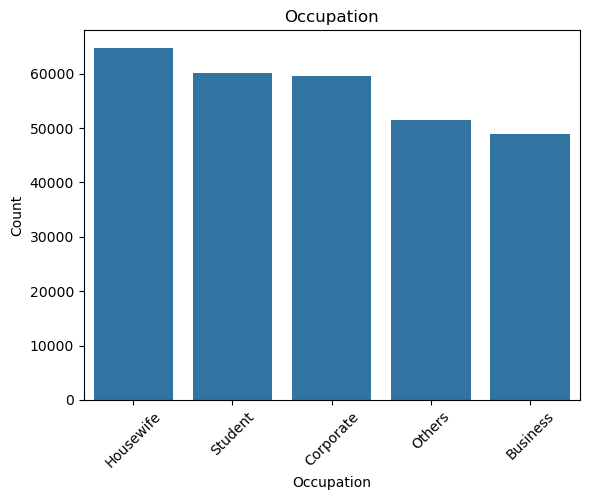

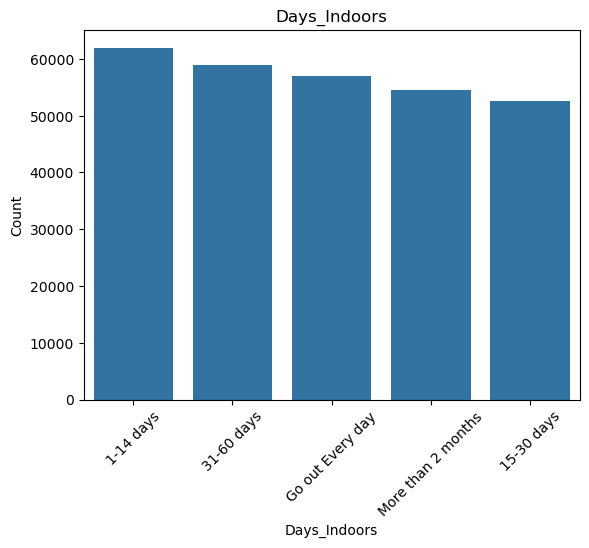

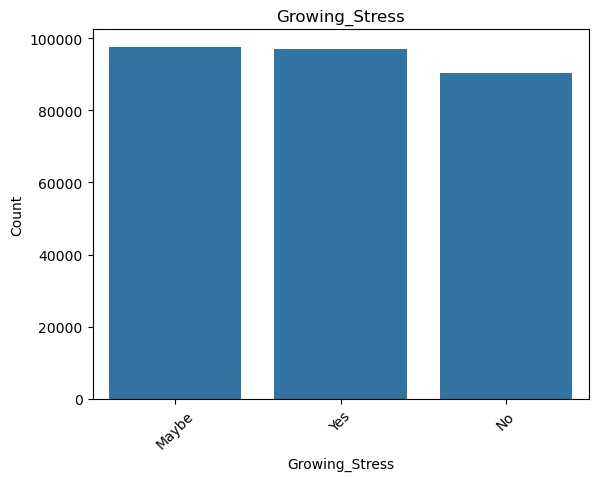

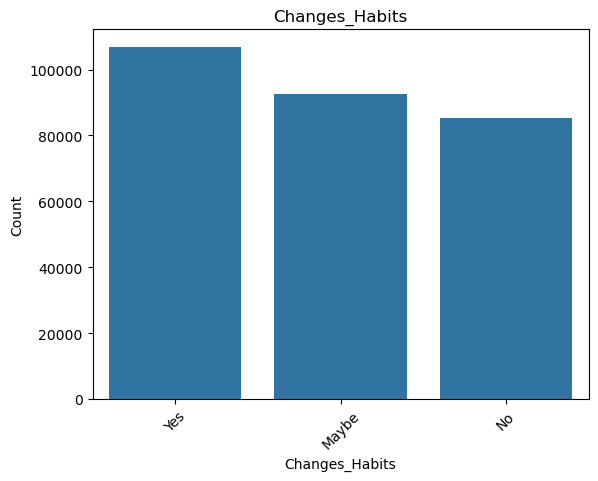

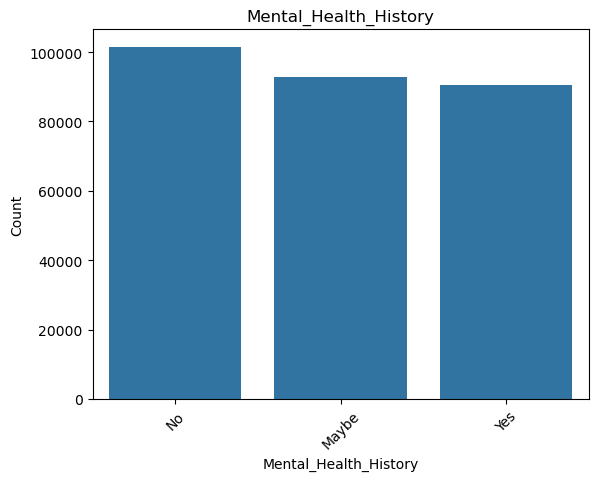

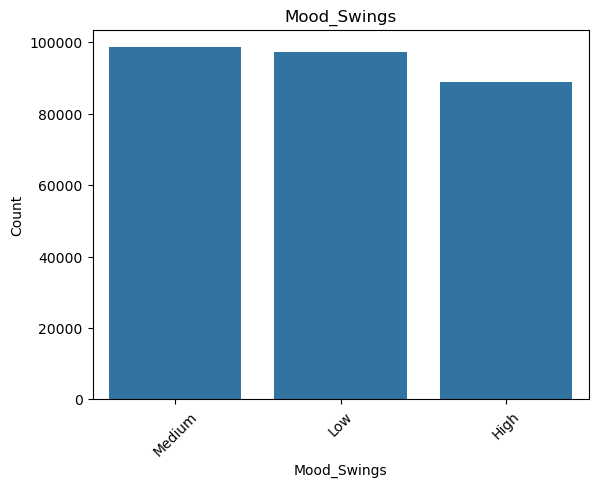

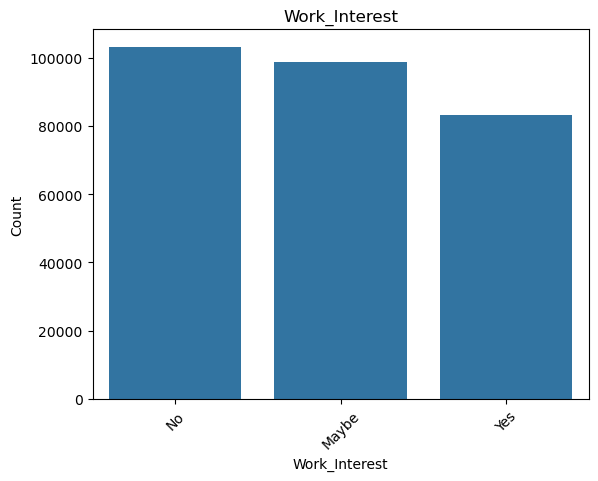

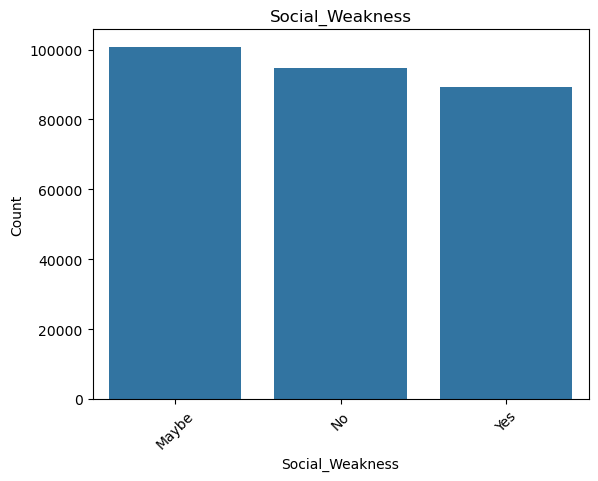

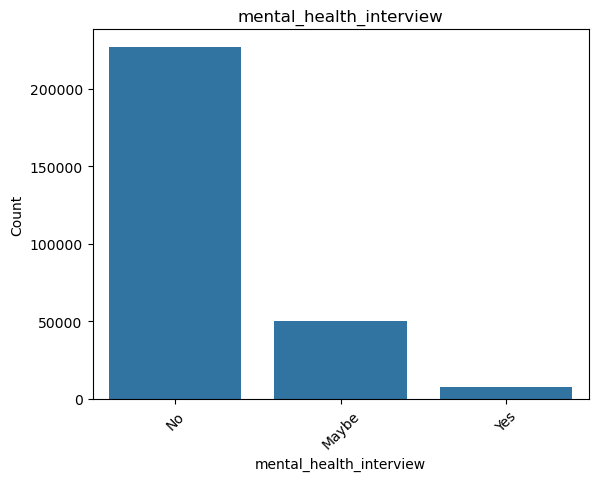

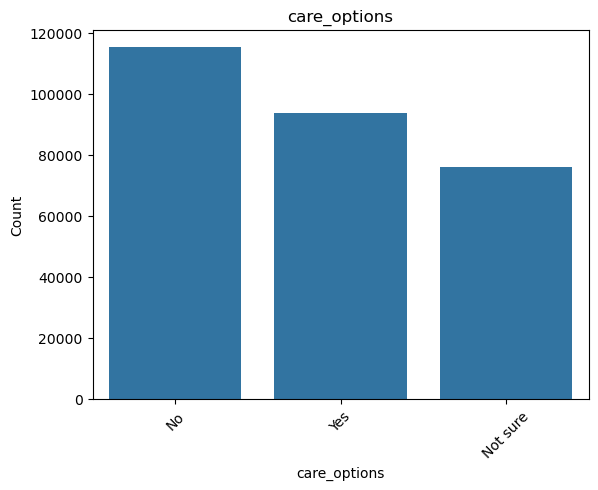

In [24]:
for column in health_df.columns:
    if health_df[column].nunique() > 2:
        bar_plot(column)

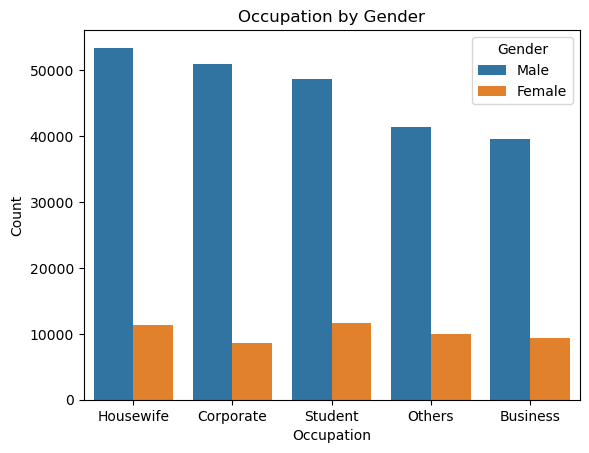

,Gender,Occupation,Count
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [25]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    health_df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

# Data Preprocessing

In [27]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_health_df = health_df.apply(le.fit_transform)

encoded_health_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [28]:
X = encoded_health_df.drop("Mood_Swings", axis = 1)

y = encoded_health_df["Mood_Swings"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 15) (56972, 15)
(227886,) (56972,)


# Model Building & Comparisons

In [31]:
def pipeline_classification(pipelines):

  # Initialize lists to store results
  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  # Perform cross-validation and store results
  for name, pipe in pipelines:
      # Fit the pipeline to the training data
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)

      # Make predictions on the test set and store them
      model_predictions[name] = pipe.predict(X_test)
    
      # Calculate probabilities on the test set and store them
      model_probabilities[name] = pipe.predict_proba(X_test)

  # Plot the results
  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  # Convert results to a DataFrame
  results_health_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_health_df, model_predictions, model_probabilities

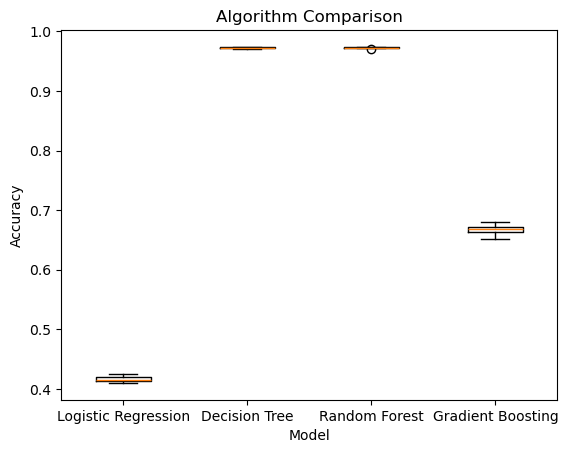

,Model,Mean Accuracy,Standard Deviation
0,Logistic Regression,0.416327,0.004712
1,Decision Tree,0.972513,0.000865
2,Random Forest,0.972570,0.000899
3,Gradient Boosting,0.667193,0.007498


In [32]:
# Define the list of pipelines
pipelines = [
    ('Logistic Regression', Pipeline([('scaler', MinMaxScaler()), ('Logistic Regression', LogisticRegression())])),
    ('Decision Tree', Pipeline([('scaler', MinMaxScaler()), ('Decision Tree', DecisionTreeClassifier())])),
    ('Random Forest', Pipeline([('scaler', MinMaxScaler()), ('Random Forest', RandomForestClassifier())])),
    ('Gradient Boosting', Pipeline([('Gradient Boosting', GradientBoostingClassifier())])),
  ]

results_health_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_health_df

In [33]:
def plot_confusion_matrix(y_true, y_pred, class_names = None, cmap = "Blues", title = ""):
  """
  Plots a confusion matrix for classification tasks.

  Args:
      y_true (array-like): True labels for the data.
      y_pred (array-like): Predicted labels for the data.
      class_names (list, optional): List of class names for the labels.
      cmap (str, optional): Colormap to use for the heatmap. Defaults to 'Blues'.
      title (str, optional): Title for the confusion matrix plot. Defaults to an empty string.

  Returns:
      None
  """

  cm = confusion_matrix(y_true, y_pred)

  if class_names is None:
      class_names = np.unique(y_true)

  plt.figure(figsize = (8, 6))
  sns.heatmap(
      cm,
      annot = True,
      fmt = 'd',
      cmap = cmap,
      xticklabels = class_names,
      yticklabels = class_names
  )

  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

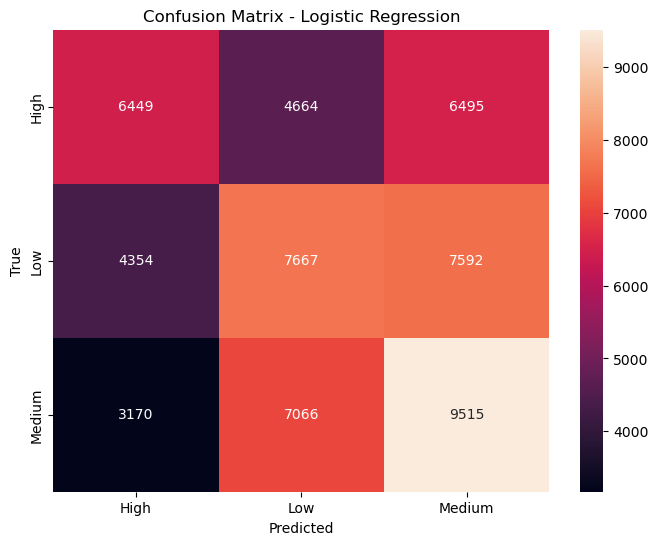

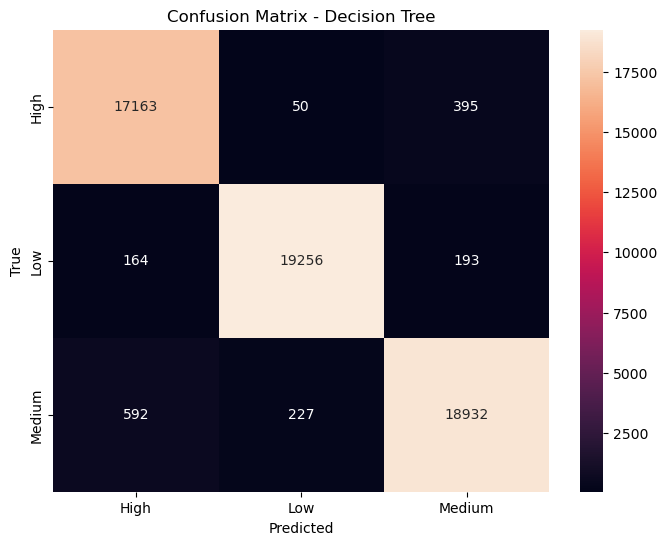

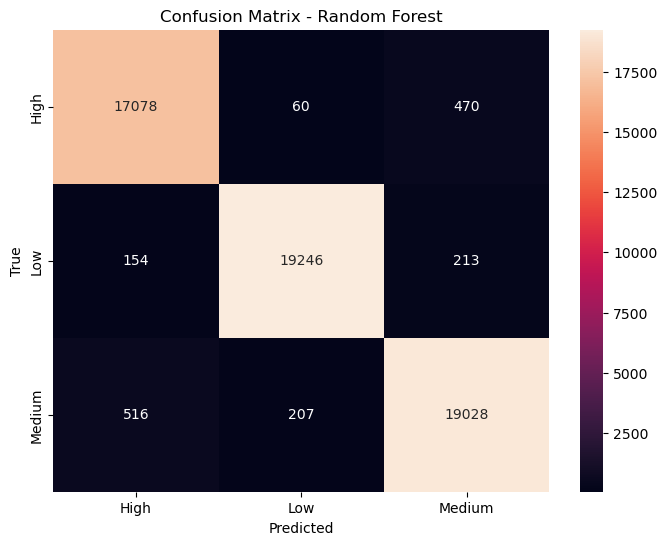

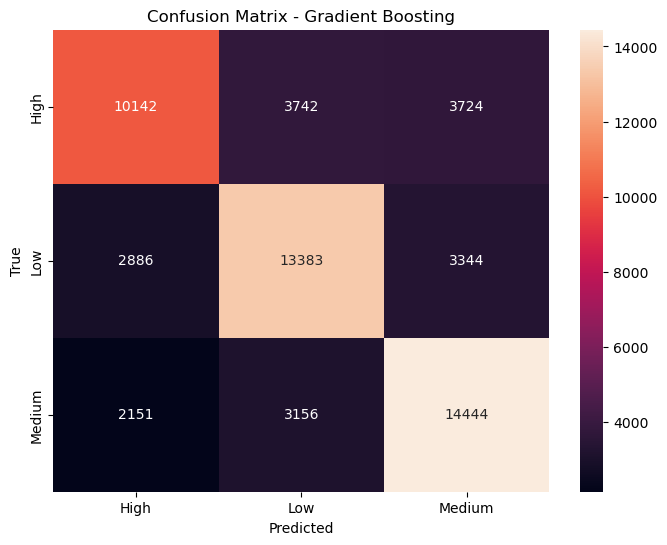

In [34]:
# Extract model names
models = results_health_df.loc[:, "Model"]

# Extract model predictions
predictions = list(model_predictions.values())

# Define labels for the class outputs
labels = health_df["Mood_Swings"].unique()[::-1]

# Define a dictionary mapping model names to colormaps
cmap_dict = {'DT': 'Blues', 'RF': 'Oranges', 'XGB': 'YlOrRd'}

for model_name, y_pred in zip(models, predictions):
  plot_confusion_matrix(
      y_test,
      y_pred,
      class_names = labels,
      cmap = cmap_dict.get(model_name),
      title = model_name
  )

In [35]:
def get_model_scores(models, predictions, y_test, average = "None"):

  scores = [{
      'Model': model_name,
      'Accuracy': round(accuracy_score(y_test, y_pred), 3),
      'Precision': round(precision_score(y_test, y_pred, average = average), 3),
      'Recall': round(recall_score(y_test, y_pred, average = average), 3),
      'F1 Score': round(f1_score(y_test, y_pred, average = average), 3)
  } for model_name, y_pred in zip(models, predictions)]

  scores_health_df = pd.DataFrame(scores)

  return scores_health_df

In [36]:
scores = get_model_scores(models, predictions, y_test, average = "macro")
scores

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.415,0.420,0.413,0.413
1,Decision Tree,0.972,0.971,0.972,0.971
2,Random Forest,0.972,0.971,0.972,0.971
3,Gradient Boosting,0.666,0.666,0.663,0.663
